In [122]:
import numpy as np
from numpy import exp, sqrt, abs
import pandas as pd
from IPython.display import display_html 
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14


!mkdir DATA
!mkdir DATA_b
!mkdir DATA_c

mkdir: cannot create directory ‘DATA’: File exists
mkdir: cannot create directory ‘DATA_b’: File exists
mkdir: cannot create directory ‘DATA_c’: File exists


## Data for encoding

In [123]:
# random seed for reproducibility
np.random.seed(12345)
print("random numbers from seed 12345:",np.random.random(4))
    
    
# size of dataset
N=10000
# number of block for one-hot encoding
G=5
# number of categories
A=4
# number of categories of kind 0
A0=int(A/2)
# number of categories of kind 1
A1=A-A0
#
AA=[A0,A1]
# size of each data point
L=G*A
#  
# Noise: probability q to change category
q=0.1
#
a=0.6
print(f"L={L}, A={A}, G={G}")

x,y = np.zeros((N,L)).astype(int), np.zeros(N).astype(int)

for n in range(N):
    # kind of the first slot
    k = np.random.randint(0,2)
    # label
    y[n] = k
    i0=0
    for g in range(G):
        # normal choice
        i = np.random.randint(0,AA[k])
        j = i + i0 + k*A0
        if np.random.random()<q:
            # normal choice
            i = np.random.randint(0,A)
            j = i + i0
        
        if(n<3): print(f"k={k}, g={g}, i0={i0}, i={i}, j={j}, AA[k]={AA[k]}")
        # one-hot encoding
        x[n][ j ] = 1
        i0= i0 + A
        k = 1 - k
                
    if(n<11): print(x[n],y[n])

print("...")
    
np.savetxt('DATA_b/x_RBM_q'+str(q)+'.dat',x,delimiter=" ",fmt="%d")
np.savetxt('DATA_b/y_RBM_q'+str(q)+'.dat',y,fmt="%d")

random numbers from seed 12345: [0.92961609 0.31637555 0.18391881 0.20456028]
L=20, A=4, G=5
k=1, g=0, i0=0, i=0, j=2, AA[k]=2
k=0, g=1, i0=4, i=0, j=4, AA[k]=2
k=1, g=2, i0=8, i=0, j=10, AA[k]=2
k=0, g=3, i0=12, i=1, j=13, AA[k]=2
k=1, g=4, i0=16, i=0, j=18, AA[k]=2
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0] 1
k=1, g=0, i0=0, i=0, j=2, AA[k]=2
k=0, g=1, i0=4, i=0, j=4, AA[k]=2
k=1, g=2, i0=8, i=1, j=11, AA[k]=2
k=0, g=3, i0=12, i=0, j=12, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 1
k=1, g=0, i0=0, i=0, j=2, AA[k]=2
k=0, g=1, i0=4, i=1, j=5, AA[k]=2
k=1, g=2, i0=8, i=1, j=11, AA[k]=2
k=0, g=3, i0=12, i=1, j=13, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1] 1
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0] 0
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0] 0
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0] 1
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0] 1
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 1
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0

## Showing Data

In [124]:
def is_one(cell_value):
    color0 = 'background-color: blue; color: white'
    color1 = 'background-color: cyan;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(x[:N1])

df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

df=df0
t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19]
)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 3 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 5 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 7 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0

## Use bits [0,1] or [-1,1]. Is reading weights easier in one of the two cases?

We choose [0 , 1]

### Now we work on CASE=1

In [125]:
CASE=1
if CASE==1: dname="DATA_b"
    
fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
v = v[1:11]
N = len(v)
L = len(v[1])

SPINS = True
# SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],v[i])
    else: print(v0[i],v[i])
print('...')

each of N=10 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0] [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] [-1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1] [-1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0] [-1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0] [-1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0] [-1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0] [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] [ 1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0] [-1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0

## initialize

In [126]:
# RBM, nr of hidden units
if CASE==1: M = 6
    
# range of each initial weight
sigma = sqrt(4. / float(L + M))

# random seed for reproducibility
np.random.seed(12345)

# initial weights from a Normal distr
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)

#choose to print a little part of our result not all of them
print("w=",w[:5]);print('\n',"a=",a[:5]);print('\n',"b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-8.02929500e-02  1.87857033e-01 -2.03740626e-01 -2.17975359e-01
   7.71042577e-01  5.46538733e-01]
 [ 3.64414674e-02  1.10509933e-01  3.01635468e-01  4.88891926e-01
   3.95052168e-01 -5.08419748e-01]
 [ 1.07860593e-01  8.97870182e-02  5.30657642e-01  3.47686193e-01
  -7.85106746e-01 -1.45848643e-01]
 [ 6.54645586e-01 -1.72021203e-01 -2.11704013e-01  1.87088914e-01
   1.27434065e+00 -4.00558390e-01]
 [-2.26352263e-01  4.86843697e-02  1.18694804e-01  2.05440307e-01
   3.68807287e-04  5.27085566e-01]]

 a= [-0.88361978 -0.45766925  0.13869612  0.27539027 -0.1076949 ]

 b= [0. 0. 0. 0. 0. 0.]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


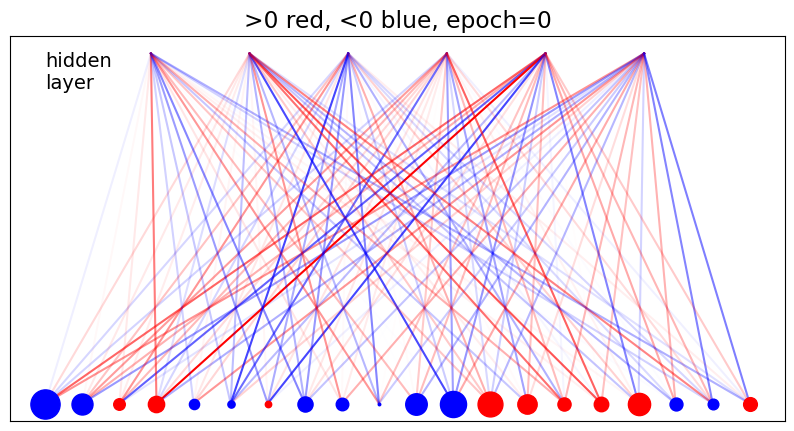

In [127]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()


def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [128]:
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)

input= [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
act= [-0.45104295 -1.90072837  3.99006603 -1.42765019 -3.70269302  0.16275698]
prob= [2.88622034e-01 2.18501149e-02 9.99657923e-01 5.44079800e-02
 6.07599982e-04 5.80667455e-01]
output= [-1 -1  1 -1 -1 -1]


array([-1, -1,  1, -1, -1, -1])

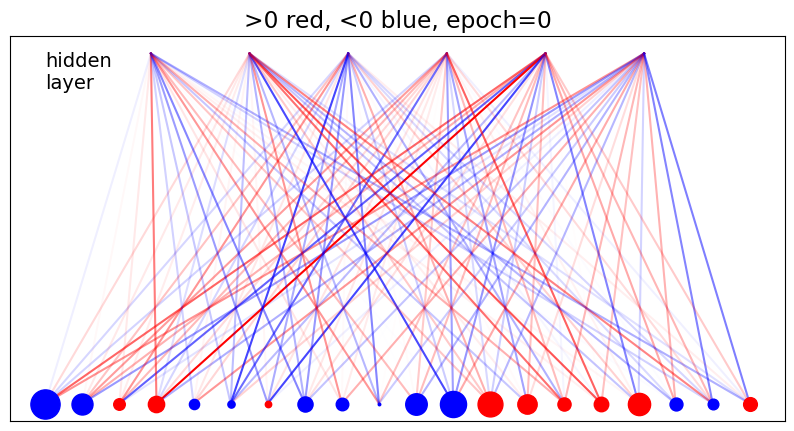

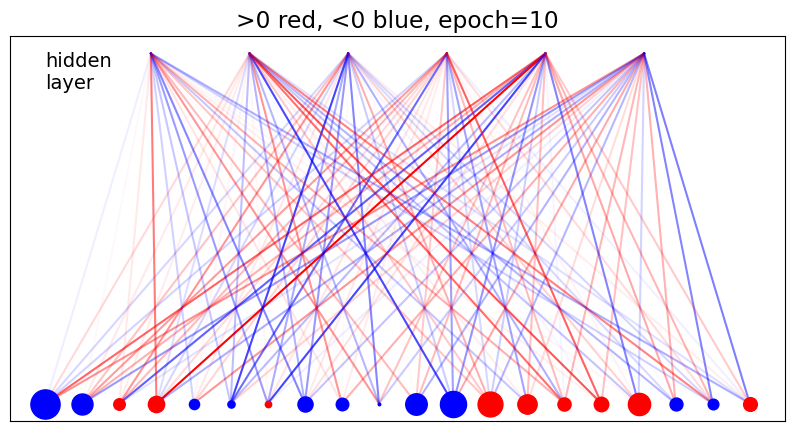

l_rate =  0.9090909090909092


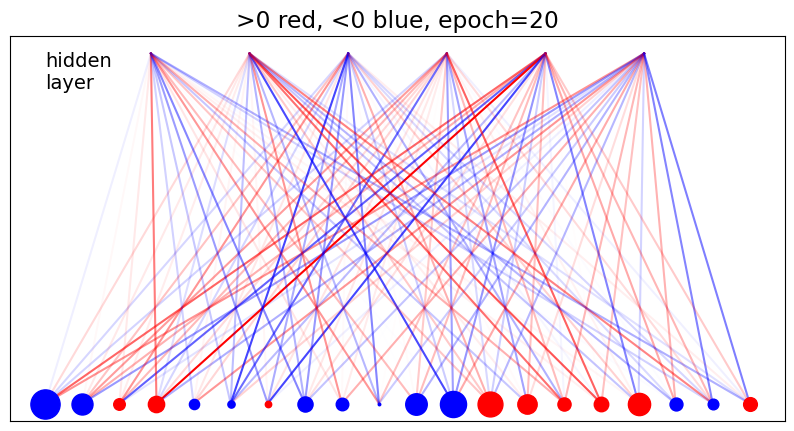

l_rate =  0.8333333333333337


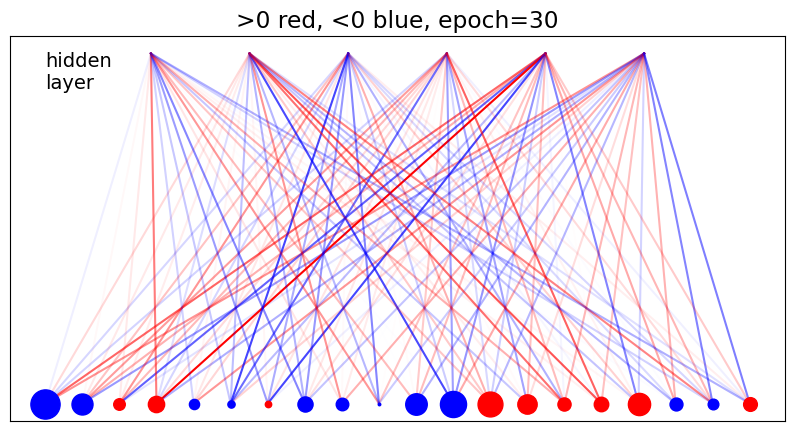

l_rate =  0.7692307692307697


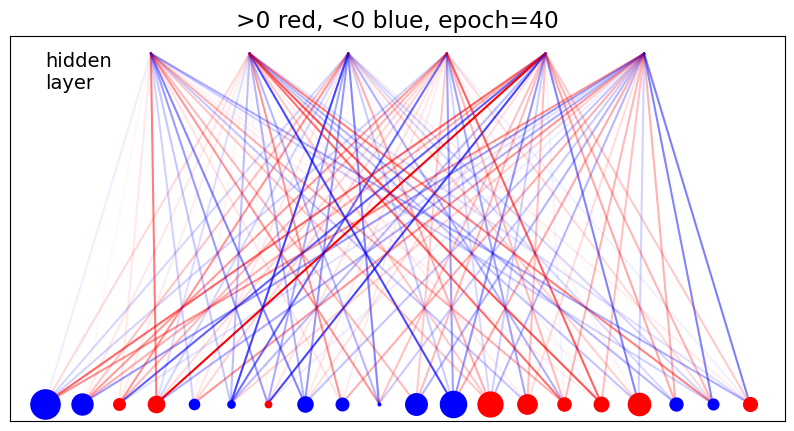

l_rate =  0.7142857142857149


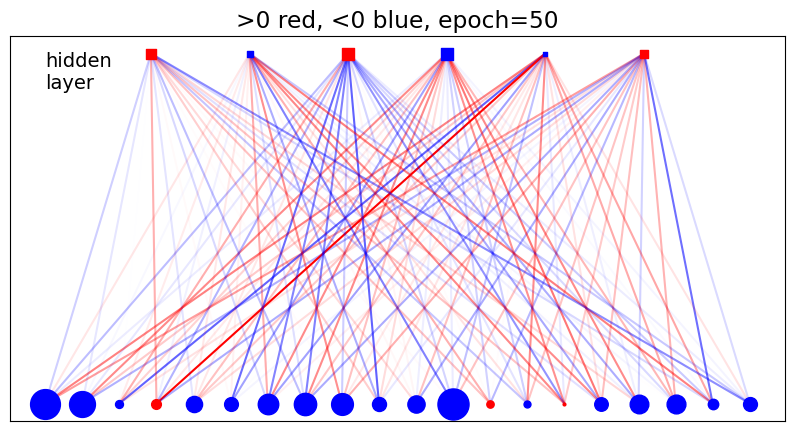

l_rate =  0.6666666666666671


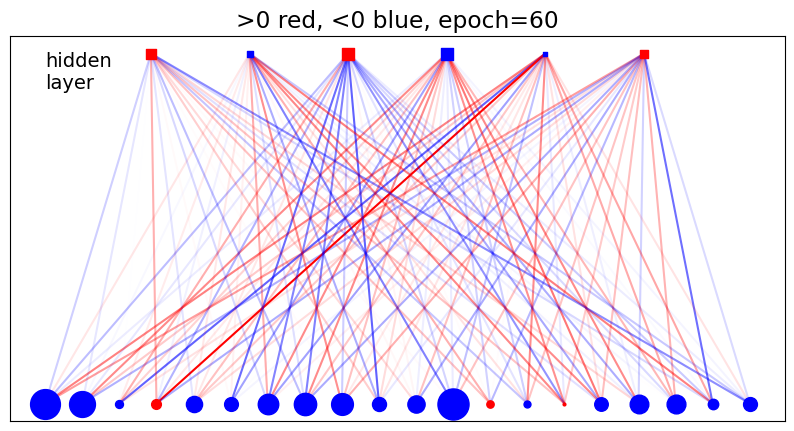

l_rate =  0.6250000000000006


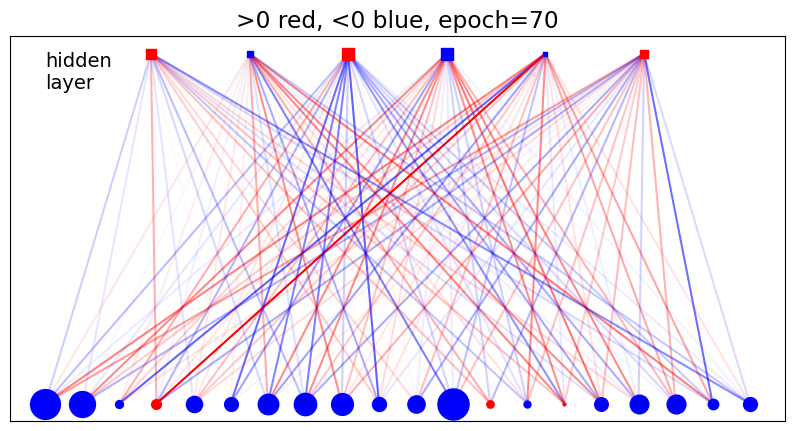

l_rate =  0.5882352941176475


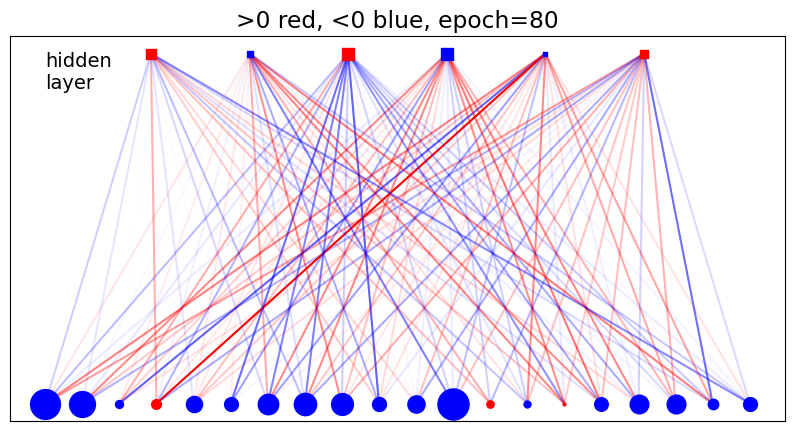

l_rate =  0.555555555555556


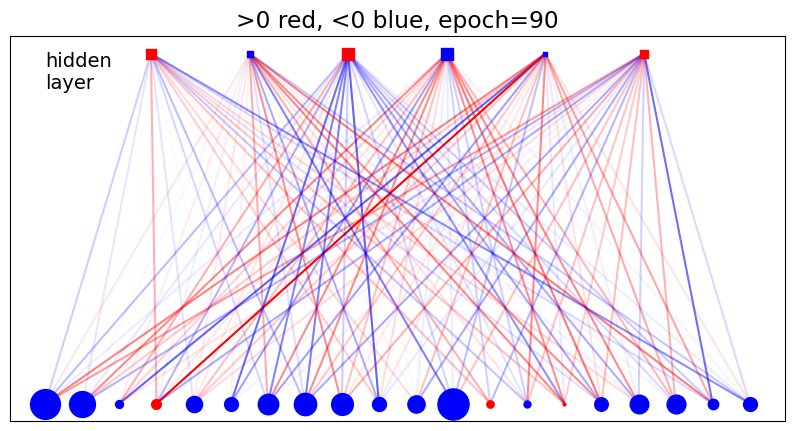

l_rate =  0.5263157894736847


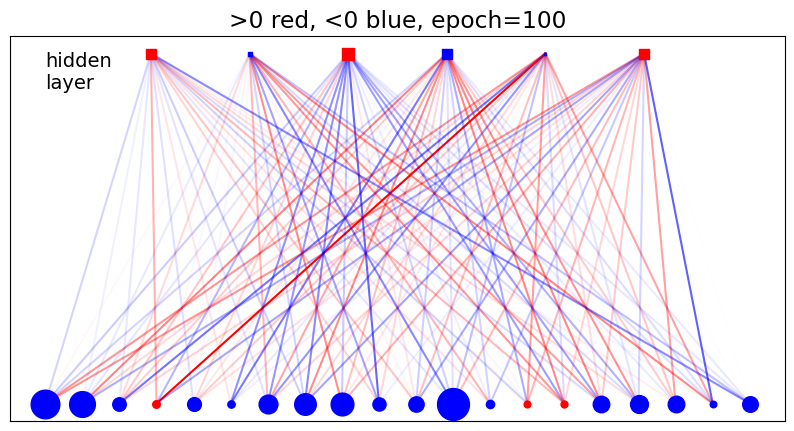

l_rate =  0.5000000000000009


In [129]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

In [130]:
#choose to print part of the result

print('w0=',w0[:5]);print('a0=',a0[:5]);print('b0=',b0)
print('\n')
print('w=',w[:5]);print('a=',a[:5]);print('b=',b)

w0= [[-8.02929500e-02  1.87857033e-01 -2.03740626e-01 -2.17975359e-01
   7.71042577e-01  5.46538733e-01]
 [ 3.64414674e-02  1.10509933e-01  3.01635468e-01  4.88891926e-01
   3.95052168e-01 -5.08419748e-01]
 [ 1.07860593e-01  8.97870182e-02  5.30657642e-01  3.47686193e-01
  -7.85106746e-01 -1.45848643e-01]
 [ 6.54645586e-01 -1.72021203e-01 -2.11704013e-01  1.87088914e-01
   1.27434065e+00 -4.00558390e-01]
 [-2.26352263e-01  4.86843697e-02  1.18694804e-01  2.05440307e-01
   3.68807287e-04  5.27085566e-01]]
a0= [-0.88361978 -0.45766925  0.13869612  0.27539027 -0.1076949 ]
b0= [0. 0. 0. 0. 0. 0.]


w= [[-0.23200453  0.03633432 -0.28102638 -0.23787351  0.56984869  0.5672463 ]
 [-0.08176028 -0.11485852 -0.13257586  0.6579385   0.20456955 -0.44057718]
 [-0.12750415  0.19901774  0.30936325  0.27044091 -0.74562073  0.23387548]
 [ 0.41705495 -0.0351759  -0.3922443   0.04626398  1.37627313 -0.47498421]
 [-0.17127149 -0.04767663  0.22524096  0.12255609  0.27687887  0.16268639]]
a= [-0.85085191 -0.

In [134]:
ampl=1000.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2

str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d',delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d',delimiter=' ')  


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

<ipython-input-128-28984813999c>:4: RuntimeWarning: overflow encountered in exp
  prob = 1. / (1. + exp(-DE*act))


Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 3 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 5 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 7 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 

 
 Denoised 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 
 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 3 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 0 
 
 
 4 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 5 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 
 
 6 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 1 
 1 
 0 
 
 
 7 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 8 
 1 
 1 
 0 
 1 
 1 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 0 
 1 
 
 
 9 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 11 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0

In [135]:
#different between fantasy data
print("difference between fantasy data:", '\n',diff
     ,'\n')
print("mean between them:",diff.mean())
print('\n')
print("standard deviation:", diff.std())

difference between fantasy data: 
 [[-0.5 -0.5 -1.  ... -0.5  0.   0.5]
 [-0.5 -0.5  0.  ... -0.5 -0.5  0. ]
 [-0.5 -0.5  0.  ... -0.5 -0.5  0. ]
 ...
 [-0.5  0.   0.  ... -0.5  0.   0. ]
 [-0.5  0.   0.  ... -0.5  0.   0. ]
 [ 0.  -0.5  0.  ...  0.  -0.5  0. ]] 

mean between them: -0.12508


standard deviation: 0.21680635046049732


### Now we work on CASE=2

In [136]:
# random seed for reproducibility
np.random.seed(12345)
print("random numbers from seed 12345:",np.random.random(4))
    
    
# size of dataset
N=10000
# number of block for one-hot encoding
G=5
# number of categories
A=4
# number of categories of kind 0
A0=int(A/2)
# number of categories of kind 1
A1=A-A0
#
AA=[A0,A1]
# size of each data point
L=G*A
#  
# Noise: probability q to change category
q=0.1
#
a=0.6
print(f"L={L}, A={A}, G={G}")

x,y = np.zeros((N,L)).astype(int), np.zeros(N).astype(int)

for n in range(N):
    # kind of the first slot
    k = np.random.randint(0,2)
    # label
    y[n] = k
    i0=0
    for g in range(G):
        # normal choice
        i = np.random.randint(0,AA[k])
        j = i + i0 + k*A0
        if np.random.random()<q:
            # normal choice
            i = np.random.randint(0,A)
            j = i + i0
        
        if(n<3): print(f"k={k}, g={g}, i0={i0}, i={i}, j={j}, AA[k]={AA[k]}")
        # one-hot encoding
        x[n][ j ] = 1
        i0= i0 + A
        k = 1 - k
                
    if(n<11): print(x[n],y[n])

print("...")
    
np.savetxt('DATA_c/x_RBM_q'+str(q)+'.dat',x,delimiter=" ",fmt="%d")
np.savetxt('DATA_c/y_RBM_q'+str(q)+'.dat',y,fmt="%d")

random numbers from seed 12345: [0.92961609 0.31637555 0.18391881 0.20456028]
L=20, A=4, G=5
k=1, g=0, i0=0, i=0, j=2, AA[k]=2
k=0, g=1, i0=4, i=0, j=4, AA[k]=2
k=1, g=2, i0=8, i=0, j=10, AA[k]=2
k=0, g=3, i0=12, i=1, j=13, AA[k]=2
k=1, g=4, i0=16, i=0, j=18, AA[k]=2
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0] 1
k=1, g=0, i0=0, i=0, j=2, AA[k]=2
k=0, g=1, i0=4, i=0, j=4, AA[k]=2
k=1, g=2, i0=8, i=1, j=11, AA[k]=2
k=0, g=3, i0=12, i=0, j=12, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 1
k=1, g=0, i0=0, i=0, j=2, AA[k]=2
k=0, g=1, i0=4, i=1, j=5, AA[k]=2
k=1, g=2, i0=8, i=1, j=11, AA[k]=2
k=0, g=3, i0=12, i=1, j=13, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1] 1
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0] 0
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0] 0
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0] 1
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0] 1
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 1
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0

In [137]:
CASE=2
if CASE==2: dname="DATA_c"
    
fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
v = v[1:11]
N = len(v)
L = len(v[1])

SPINS = True
# SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],v[i])
    else: print(v0[i],v[i])
print('...')

each of N=10 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0] [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] [-1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1] [-1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0] [-1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0] [-1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0] [-1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0] [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] [ 1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0] [-1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0

## initialize

In [140]:
# RBM, nr of hidden units
if CASE==2: M = 2
    
# range of each initial weight
sigma = sqrt(4. / float(L + M))

# random seed for reproducibility
np.random.seed(12345)

# initial weights from a Normal distr
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)

#choose to print a little part of our result not all of them
print("w prim=",w[:5]);print('\n',"a prim=",a[:5]);print('\n',"b prim=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w prim= [[-0.08728764  0.20422213]
 [-0.22148941 -0.2369642 ]
 [ 0.83821165  0.59415024]
 [ 0.03961605  0.12013696]
 [ 0.32791232  0.53148156]]

 a prim= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957]

 b prim= [0. 0.]


In [141]:
k = 0
activate(v[k],w,b,GAP,info=True)

input= [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
act= [3.46176353 1.0785074 ]
prob= [0.99901662 0.89632247]
output= [ 1 -1]


array([ 1, -1])

In [142]:
#choose to print part of the result

print('w0 prim=',w0[:5]);print('a0 prim=',a0[:5]);print('b0 prim=',b0)
print('\n')
print('w prim=',w[:5]);print('a prim=',a[:5]);print('b prim=',b)

w0 prim= [[-0.08728764  0.20422213]
 [-0.22148941 -0.2369642 ]
 [ 0.83821165  0.59415024]
 [ 0.03961605  0.12013696]
 [ 0.32791232  0.53148156]]
a0 prim= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957]
b0 prim= [0. 0.]


w prim= [[-0.08728764  0.20422213]
 [-0.22148941 -0.2369642 ]
 [ 0.83821165  0.59415024]
 [ 0.03961605  0.12013696]
 [ 0.32791232  0.53148156]]
a prim= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957]
b prim= [0. 0.]


In [145]:
ampl=100.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2

str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d',delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d',delimiter=' ')  


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 3 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 5 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 7 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 

 
 Denoised 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 
 
 5 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 
 
 6 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 7 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 8 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 
 
 9 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 
 
 10 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 11 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0

In [146]:
#different between fantasy data
print("difference between fantasy data:", '\n',diff
     ,'\n')
print("mean between them:",diff.mean())
print('\n')
print("standard deviation:", diff.std())

difference between fantasy data: 
 [[-0.5 -0.5  0.  ... -0.5 -1.  -0.5]
 [-0.5 -0.5  0.  ... -0.5 -0.5 -1. ]
 [-0.5 -0.5 -1.  ... -0.5 -0.5 -1. ]
 ...
 [-0.5  0.   0.  ... -0.5  0.   0. ]
 [-0.5  0.   0.  ... -0.5  0.   0. ]
 [ 0.  -0.5  0.  ...  0.  -0.5  0. ]] 

mean between them: -0.12505


standard deviation: 0.21699653799081678
